# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

This project uses sales data that was given by the client. The data includes info about the a customer's User ID, Name, Gender, Age, and Estimated Salary. This project aims to use multiple machine learning models such as Logistic Regression or Random Forest Classification to predict whether a customer will purchase the item or will not purchase the item based on the attributes listed above. The store ultimately wants to find out why their sales are dropping and gain insightful knowledge about their customer data. The performance measures that will be used is the F1 score and accuracy score. 

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

The data was provided by the client. 

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

In [1]:
#import necessary libraries
import pandas as pd
from pathlib import Path
import numpy as np

#read the csv file from my data folder
sales_forcasting_data = pd.read_csv(Path("data/EmilyH.csv"))

sales_forcasting_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          10001 non-null  int64 
 1   name             10001 non-null  object
 2   Gender           10001 non-null  object
 3   Age              10001 non-null  int64 
 4   EstimatedSalary  10001 non-null  int64 
 5   Purchased        10001 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In the above, I can see that there are no missing data values for any of the columns. I can also see there are 1001 rows of data. User ID, Age, EstimatedSalary are all numeric attributes. Gender and name are non-numeric attributes. 

In [2]:
#prints out the names of the columns
print(sales_forcasting_data.columns.tolist())


['User ID', 'name', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


In the above I can see the names of all the columns that I'll be working with. 

In [3]:
sales_forcasting_data["User ID"].value_counts()

User ID
10000    1
16671    1
16664    1
16665    1
16666    1
        ..
13334    1
13335    1
13336    1
13337    1
20000    1
Name: count, Length: 10001, dtype: int64

In the above, I can see that there are no repeating User ID's which means that everyone has a unique User ID. This can indicate that there will be no skew in the data for this column but there will also be no meaningful relationships. This is probably a column I will drop when I process the data. 

In [4]:
sales_forcasting_data["name"].value_counts()

name
Michael Smith        6
Richard Smith        5
Jennifer Gonzalez    5
Jessica Johnson      5
Jason Jones          5
                    ..
Michael Ramirez      1
Nicholas Bruce       1
Derek Smith          1
Maria Henry          1
James Hogan          1
Name: count, Length: 9379, dtype: int64

In the above, I can see that there are many people with the same first and last name. However, since name is not useful in this machine learning model, I will most likely drop this column during data processing.
Several reasons why names aren't useful:
-Names are typically unique identifiers and do not contain significant patterns or information that would be relevant to predicting outcome like purchasing behavior. 
-Including names as features can add noise to the model. 

In [5]:
sales_forcasting_data["Gender"].value_counts()

Gender
Female    5043
Male      4958
Name: count, dtype: int64

In the above, I can see there is more female than men in the data (roughly 100 more instances). However, the data is for this column is still pretty balanced and will probably not cause significant skew. 

In [6]:
#analyzing the relationship between Gender and Purchased
gender_purchase_relationship = sales_forcasting_data.groupby("Gender")["Purchased"].mean()

gender_purchase_relationship


Gender
Female    0.410867
Male      0.402985
Name: Purchased, dtype: float64

In the above, I can see the difference in purchasing behavior between females and males is very small, suggesting that gender will not play a significant role in determining whether a customer will purchase an item. Female is only higher by 1 percent which indicates that both genders have similar purchasing tendencies. 

In [7]:
sales_forcasting_data["Age"].value_counts()

Age
57    311
29    276
24    273
31    267
33    265
41    262
36    262
21    261
32    260
25    259
51    257
27    256
20    256
40    255
42    255
50    254
52    253
46    252
30    251
22    250
23    250
53    250
34    248
55    247
48    246
45    245
39    243
37    242
56    240
43    240
35    240
59    239
54    238
47    237
49    236
26    228
44    227
28    226
38    225
58    219
Name: count, dtype: int64

In the above, I can see that the there is a pretty even distribution of ages. The counts accross different ages are fairly close in range, indicating a relatively even distribution with no drastic spikes or drops in population across most ages. 

-The highest count is for age 57 with 311 individuals, while the lowest count is for age 58 with 219 individuals. This suggests that age 57 might be a slightly more represented age group in this sample.

-The age groups seem to follow a somewhat balanced distribution, though there is a minor decline in representation as ages increase past the mid-50s, possibly indicating a very slightly older population in the sample.

-There is a slight clustering of Ages from 20 to 57 all have fairly similar counts (mostly between 240-311), showing no strong outliers or underrepresented age groups.



In [8]:
sales_forcasting_data["EstimatedSalary"].value_counts() 

EstimatedSalary
16634     3
52221     3
96109     3
24175     3
84287     3
         ..
60431     1
126399    1
42675     1
20900     1
81936     1
Name: count, Length: 9653, dtype: int64

In the above, I can see that there are certain salaries that appear multiple times in the dataset, with the highest frequency being 3 occurrences. However, the general distribution of EstimatedSalary shows a relatively spread out range, without any skew in any specific direction. 

In [9]:
purchase_relationship = sales_forcasting_data.groupby("Purchased")["EstimatedSalary"].mean()

purchase_relationship

Purchased
-1    77171.328767
 0    77974.144225
 1    79213.578476
Name: EstimatedSalary, dtype: float64

In the above, I can see that the differences in average salary between those who purchased and those who didn't are quite small, suggesting that EstimatedSalary may not be a major factor influencing purchasing decisions. 

In [10]:
sales_forcasting_data["Purchased"].value_counts()

Purchased
 0    4909
 1    4581
-1     511
Name: count, dtype: int64

In the above, I can see that there are roughly 300 more people that didn't purchase the item than people who purchased the item. And there are about 5% of people who returned the item out of the total population (511/10001). And 10% of people that retruned the item after purchasing it (511/5092). This indicates that the majority of people who purchased the item didn't return the item. 

In [11]:
#displays info such as mean, std, min, 50%, max related to the housing data so it's easier to get a grasp of the data distribution
sales_forcasting_data.describe()


,User ID,Age,EstimatedSalary,Purchased
count,10001.000000,10001.000000,10001.000000,10001.000000
mean,15000.000000,39.383562,78500.852515,0.406959
std,2887.184355,11.582826,41052.299785,0.586146
min,10000.000000,20.000000,8027.000000,-1.000000
25%,12500.000000,29.000000,42874.000000,0.000000
50%,15000.000000,39.000000,77940.000000,0.000000
75%,17500.000000,50.000000,114322.000000,1.000000
max,20000.000000,59.000000,149995.000000,1.000000


In the above, I can see that the median salary of 77,940 dollars did not purchase the item. 
- The minimum salary of 8,027 dollars returned the item.  
- The 1st quartile salary of 42,874 dollars did not purchase the item.
- The 3rd quartile salary of 77,940 dollars did purchase the item. 
- The max salary of 149,995 dollars did purchase the item. 

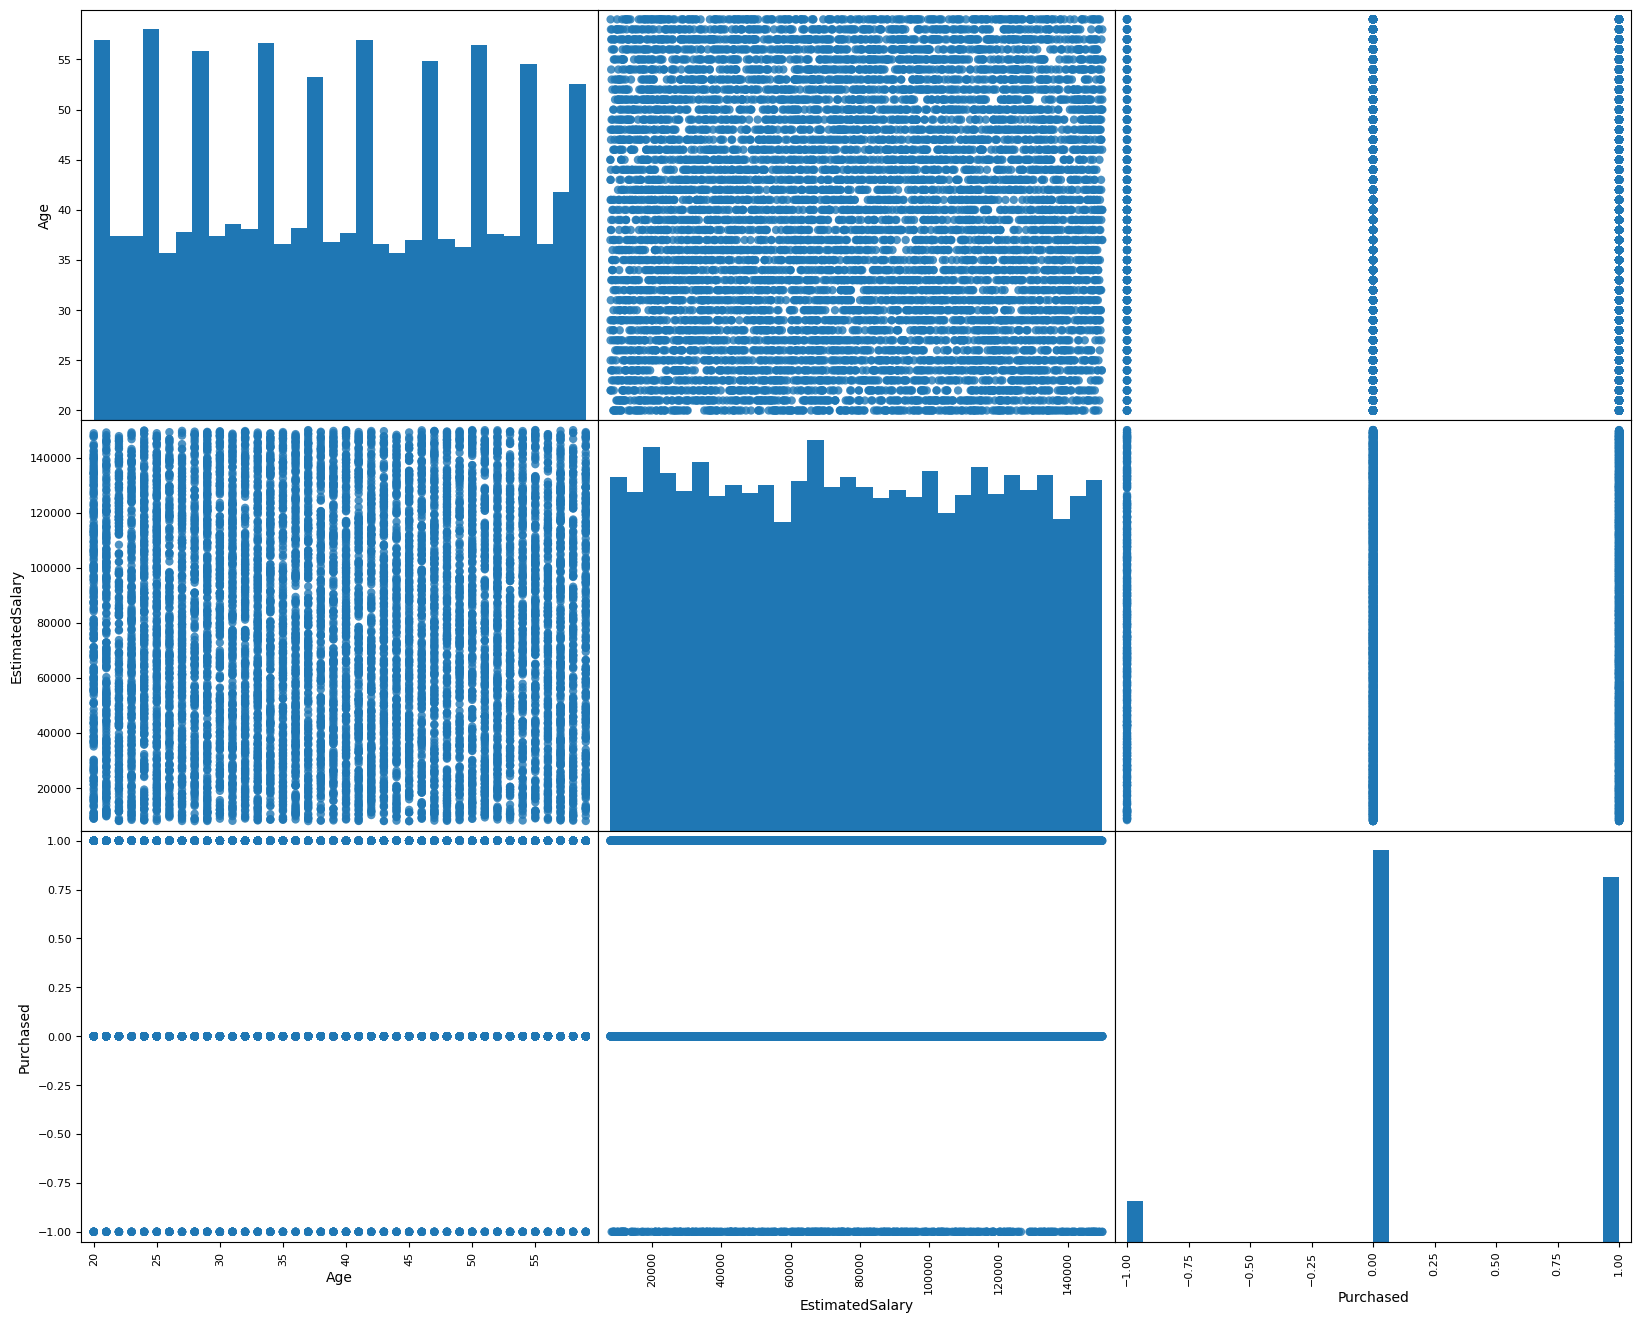

In [12]:
#importing necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix


#numeric attributes for the scatter matrix
attributes_numeric = ["Age", "EstimatedSalary", "Purchased"]

#creating the scatter matrix for the numeric columns
scatter_matrix(sales_forcasting_data[attributes_numeric], figsize=(20,16), alpha=0.8, marker='o', hist_kwds={'bins': 30}, diagonal='hist')

#displaying the scatter matrix
plt.show()


In the above:
-For Age vs. Estimated salary there is no strong linear relationship between age and estimated salary, as the points are scattered across the entire plot. 
-For Age vs. Purchased there is no obvious pattern indicating that age has a strong influence on purchasing behavior. Customers of all ages seem to have similar purchasing patterns. 
-For Estimated Salary vs. Purchased the plot shows that purchasing behavior is spread across different salary ranges, with no clear concentration of purchases at any purticular salary level. This suggests that there is no strong correlation between salary and the purchasing behavior. 

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

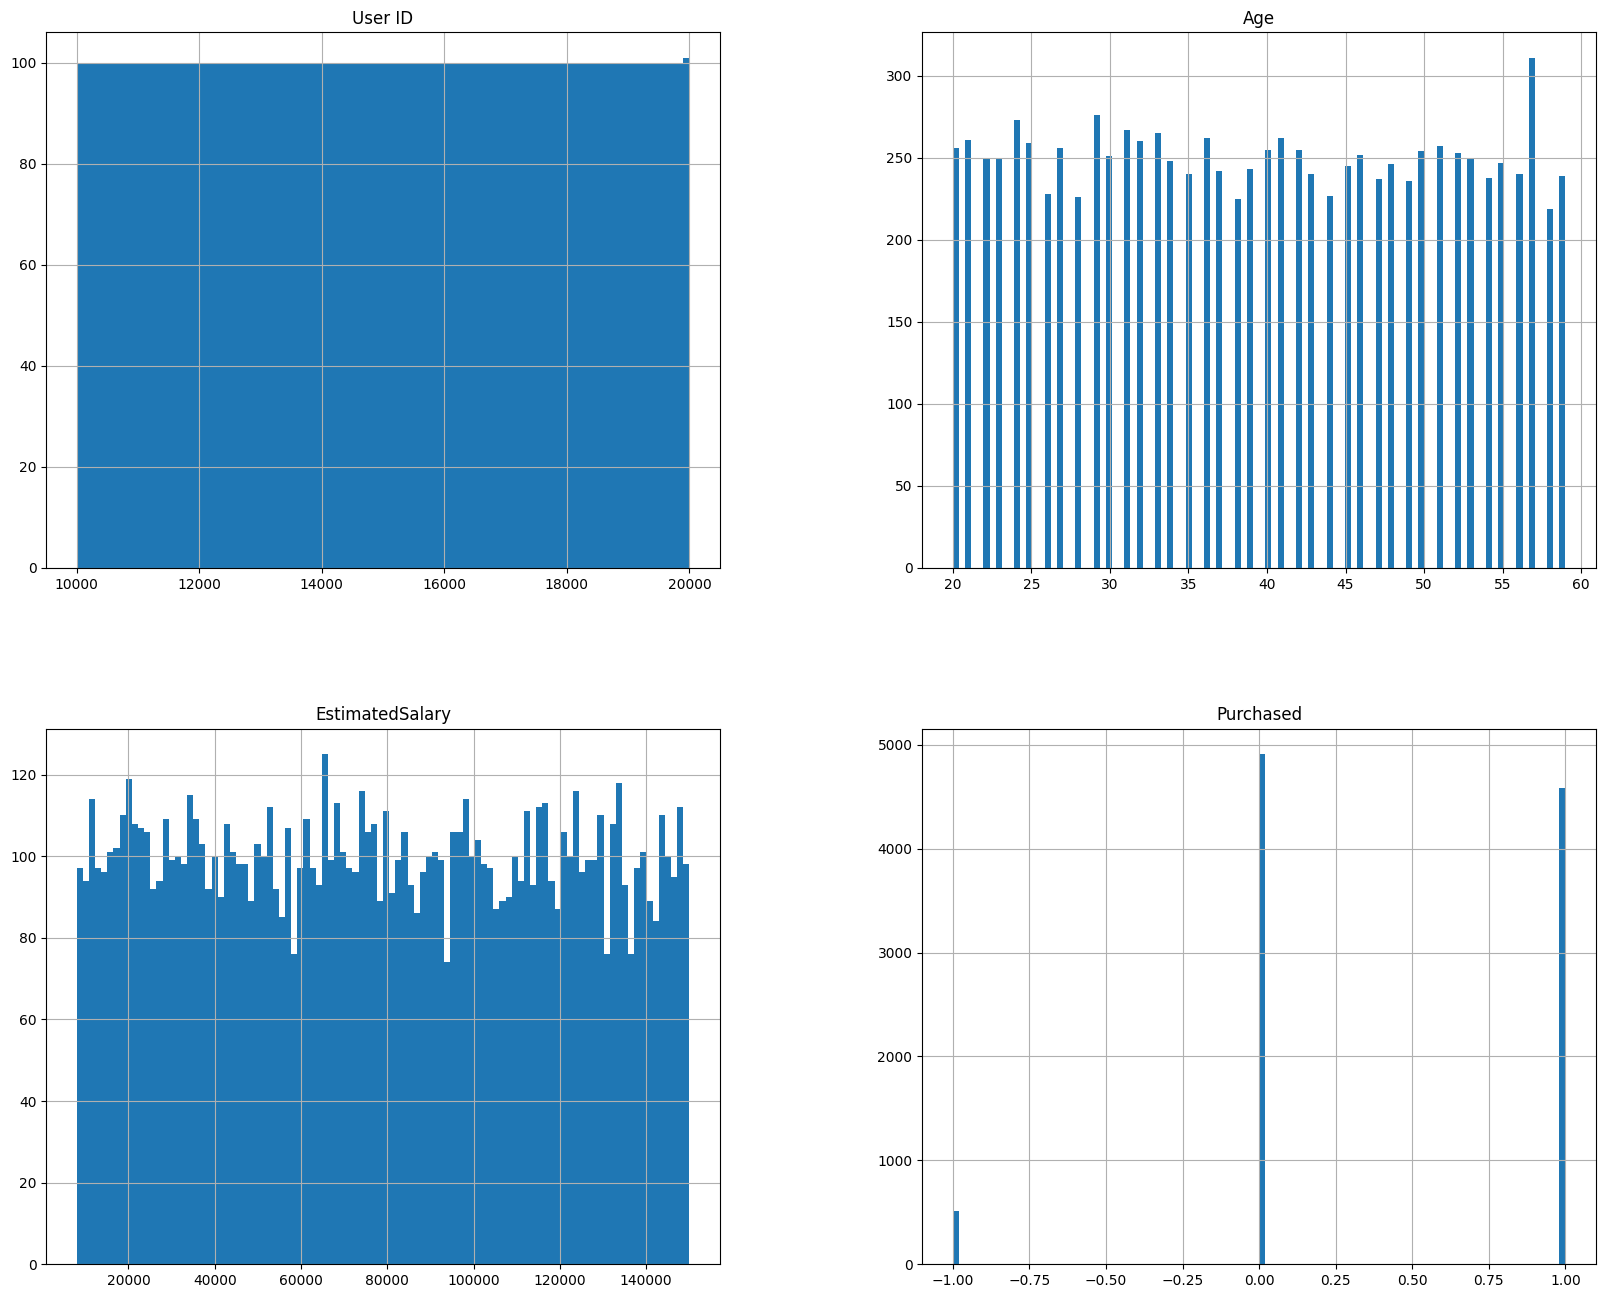

In [13]:
#displays a histogram of the attributes for the data
sales_forcasting_data.hist(bins=100,figsize=(20,16))

-In the above, I can see that the age distribution is uniform and there is no strong correlation between age and purchasing. 
-The salary distribution is pread out with no clear peak. This indicates that there is no obvious indication that purchasing behavior is strongly tied to salary. 
-The Purchased attribute is binary and the histogram shows a relatively balancd dataset between those who purchased and those who didn't. This balance likely indicates that the model trained on this data won't be biased toward one outcome. 

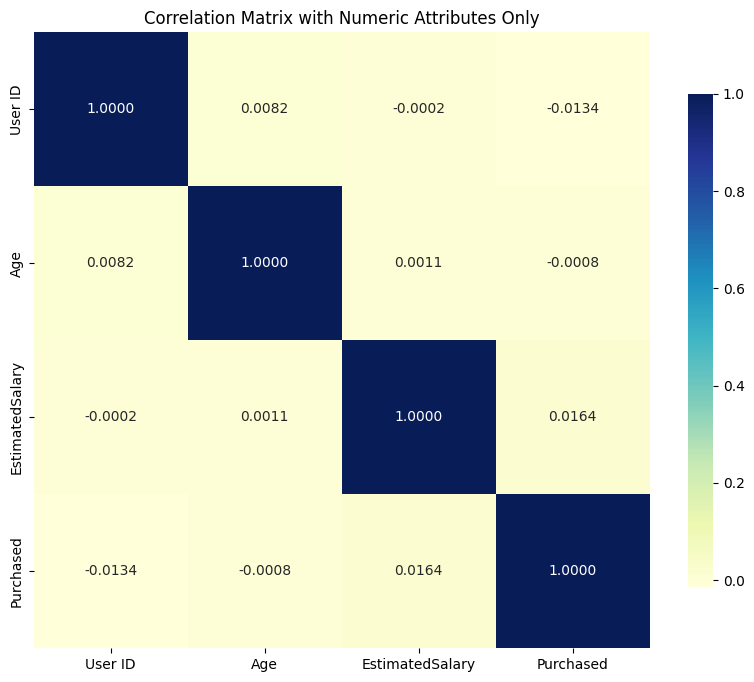

In [14]:
#importing seaborn for heatmap and creating a correlation matrix for the numeric attributes
import seaborn as sns

#creating the correlation matrix with only numeric attributes
correlation_matrix = sales_forcasting_data.corr(numeric_only=True)

#creating the heatmap for the correlation matrix with updated colors for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})

#adding title and displaying the correlation matrix
plt.title('Correlation Matrix with Numeric Attributes Only')
plt.show()



For the above: 
Age and Estimated Salary: The correlation is 0.0011, which is very close to zero. This indicates that there is almost no linear relationship between a person's age and their estimated salary in this dataset.

Age and Purchasing Behavior: The correlation is -0.0008, which also suggests no meaningful relationship between age and the likelihood of purchasing. Age does not seem to play a significant role in whether or not a customer will buy the product.

Estimated Salary and Purchasing Behavior: The correlation is 0.0164, which is extremely weak. This shows that estimated salary has almost no direct impact on purchasing behavior in the dataset.



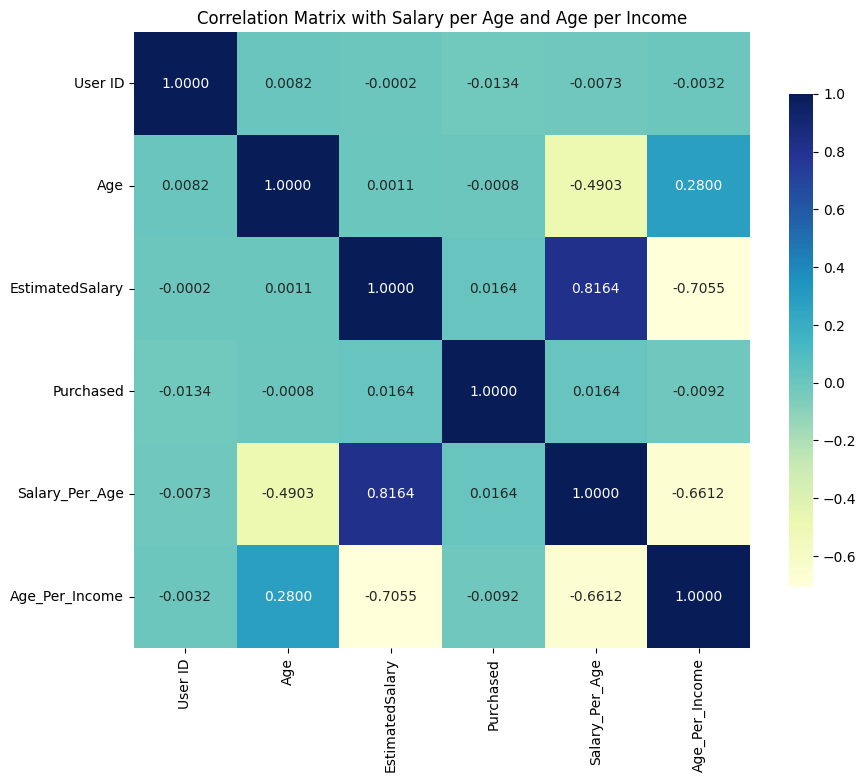

In [15]:
#adding the Salary per Age and Age per Income attributes 

#salary per Age is EstimatedSalary divided by Age
sales_forcasting_data["Salary_Per_Age"] = sales_forcasting_data["EstimatedSalary"] / (sales_forcasting_data["Age"].replace(0, 1))

#age per Income is Age divided by EstimatedSalary 
sales_forcasting_data["Age_Per_Income"] = sales_forcasting_data["Age"] / (sales_forcasting_data["EstimatedSalary"].replace(0, 1))

#creating the correlation matrix including the new attributes
correlation_matrix_updated = sales_forcasting_data.corr(numeric_only=True)

#plotting the updated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_updated, annot=True, fmt=".4f", cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})

#adding title and displaying the correlation matrix
plt.title('Correlation Matrix with Salary per Age and Age per Income')
plt.show()


Salary per Age has a correlation of 0.0164 with purchasing behavior. This is a very weak positive correlation, indicating that the ratio of salary to age has little influence on whether a customer will make a purchase.

Age per Income has a correlation of -0.0092 with purchasing behavior. This is a very weak negative correlation, suggesting that this ratio also has little effect on purchasing decisions.

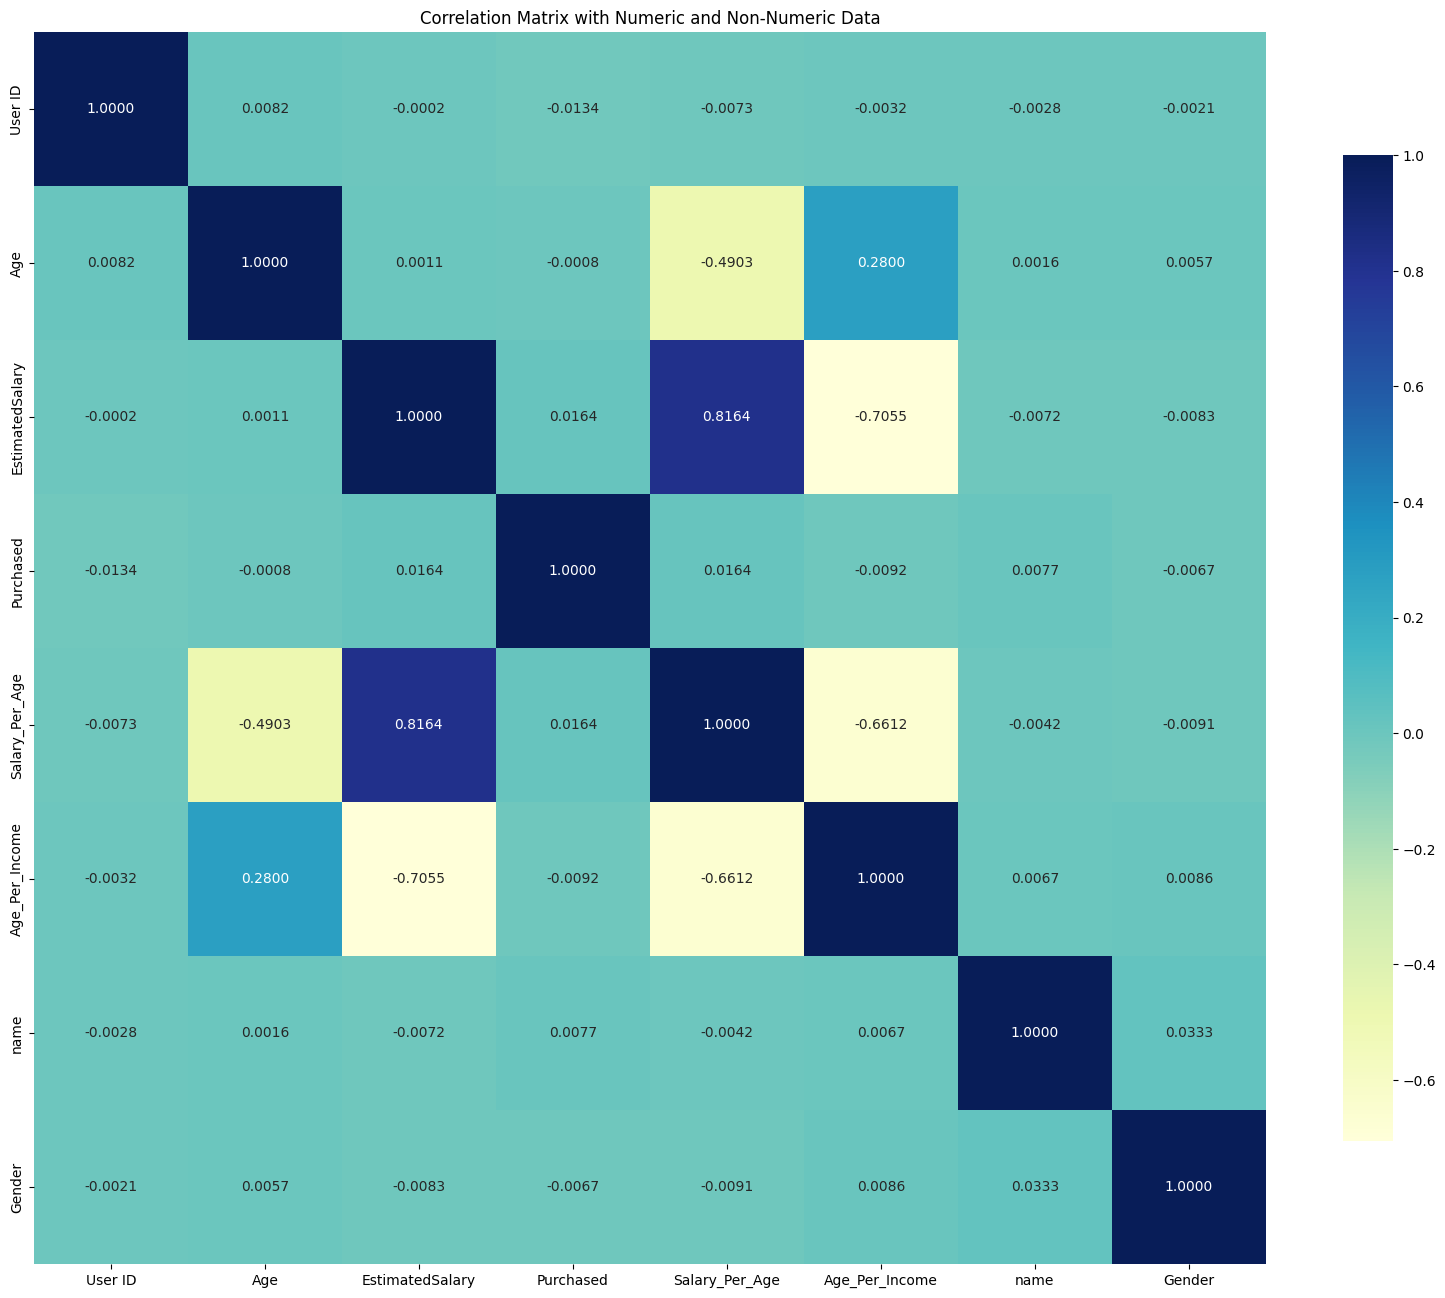

In [16]:
#import necessary library to change the non numeric attributes to become numeric
from sklearn.preprocessing import OrdinalEncoder

numeric_data = sales_forcasting_data.select_dtypes(include='number')
non_numeric_data = sales_forcasting_data.select_dtypes(exclude='number')

#changes the non numeric data to become numeric using OridinalEncoder
encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(non_numeric_data)
encoded_df = pd.DataFrame(encoded_data, columns=non_numeric_data.columns)

#combines the numeric and the changed data
combined_data = pd.concat([numeric_data, encoded_df], axis=1)

#uses the corr() function to create a correlation matrix
correlation_matrix = combined_data.corr() 

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='YlGnBu', square=True, cbar_kws={"shrink": .8})

#displays the correlation matrix for the numeric and the non numeric attributes
plt.title('Correlation Matrix with Numeric and Non-Numeric Data')
plt.show()


In the above, the correlation between Gender and Purchased is -0.0067, which indicates a very weak negative correlation. This means that there is almost no linear relationship between a customer's gender and their purchasing behavior. 

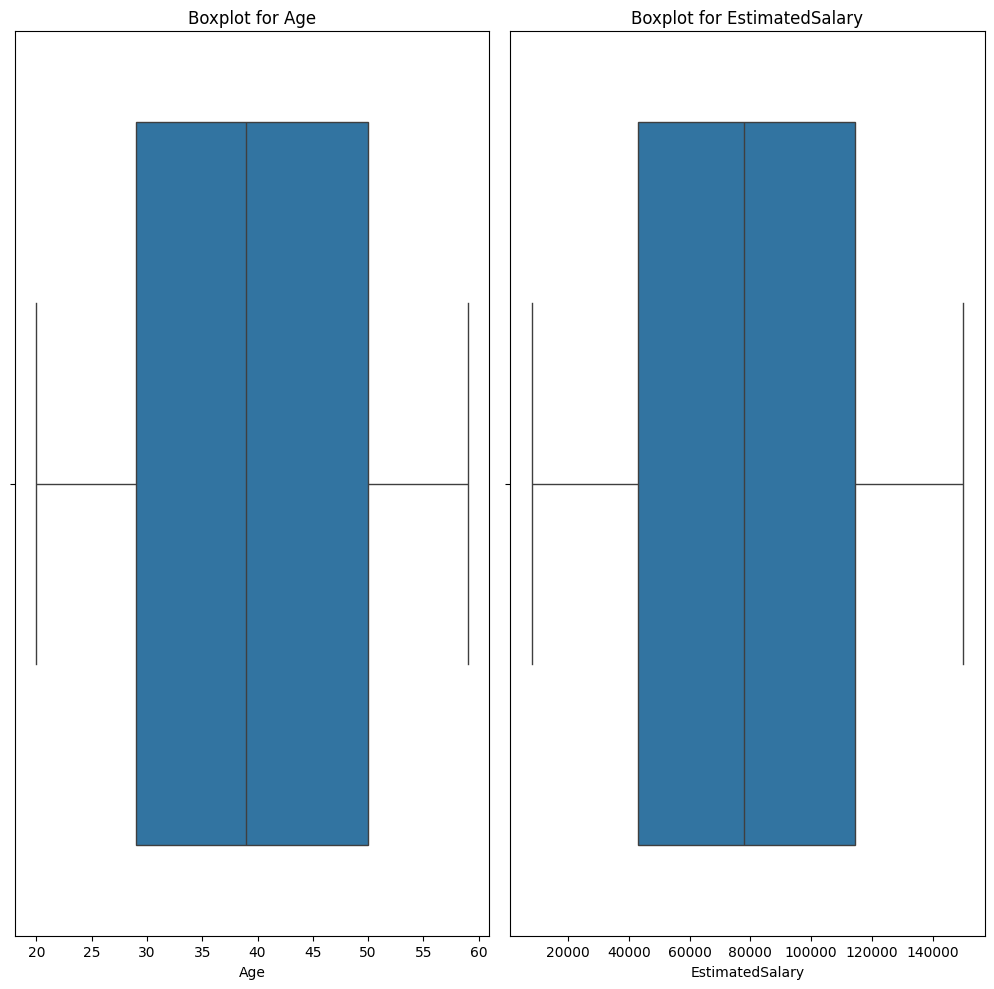

In [17]:
#check for outliers using box plots

#columns to check for outliers
columns_to_check = ['Age', 'EstimatedSalary']

#determine the number of rows and columns needed for subplots
n_cols = 3  # nmber of columns in the plot grid
n_rows = (len(columns_to_check) + n_cols - 1) // n_cols  #calculate the number of rows needed

#plotting boxplots for each column to identify outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(n_rows, n_cols, i)  #dynamically create subplots based on the number of columns
    sns.boxplot(x=sales_forcasting_data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In the above I can see that there are no significant outliers for age or for estimated salary. 

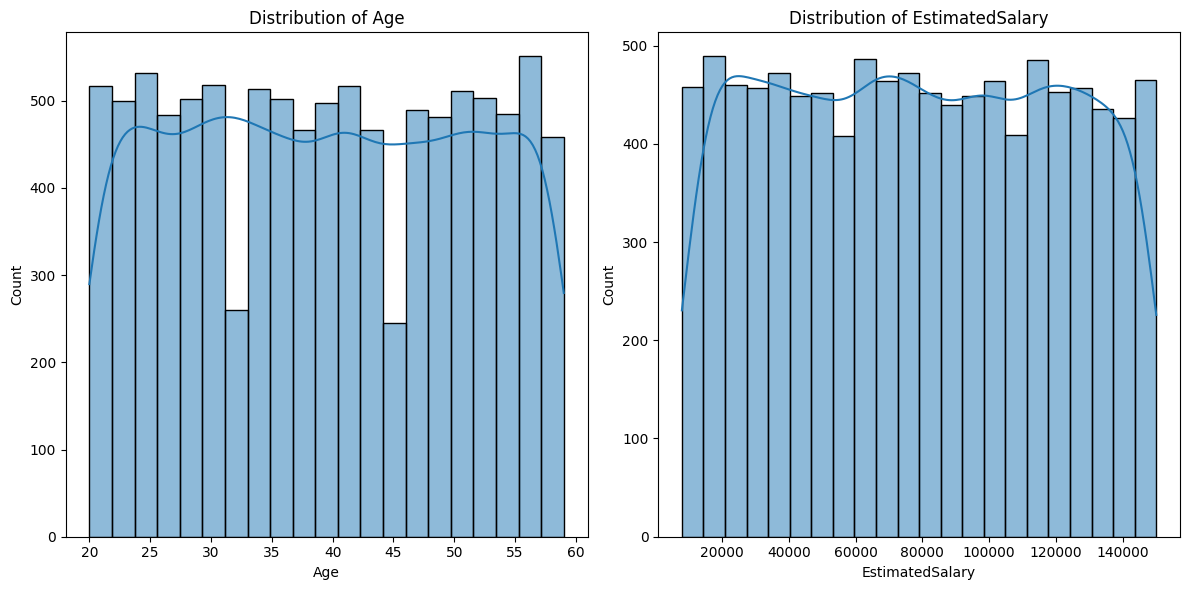

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#plotting the distribution of Age and EstimatedSalary to check for skewness and outliers
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#distribution of Age
sns.histplot(sales_forcasting_data['Age'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Age')

#distribution of EstimatedSalary
sns.histplot(sales_forcasting_data['EstimatedSalary'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of EstimatedSalary')

plt.tight_layout()
plt.show()


- Here I can see the even distributions between for Age and for Estimated Salary. However, there are a good amount of people who have either lower salary ranges or higher salary ranges but these valules are not skewed too much from the general trend. I wouldn't consider them outliers since the values are still reasonable.
- I noticed that there are significantly fewer data points for individuals between the ages of 30 and 35, as well as for those aged 45, compared to the rest of the dataset. 

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [19]:
import numpy as np
import pandas as pd
import joblib
from pathlib import Path
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

sales_forcasting_data = pd.read_csv(Path("data/EmilyH.csv"))

#define the preprocessing pipeline for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['EstimatedSalary']),
        ('age_scaler', StandardScaler(), ['Age']),  
        ('cat', OrdinalEncoder(), ['Gender']) 
    ])

#create the final pipeline for preprocessing and classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(
        weights='distance',  
        n_neighbors=262,  
        metric='manhattan'  
    ))
])

#separate features 
X = sales_forcasting_data[['Gender', 'Age', 'EstimatedSalary']]  #features
y = sales_forcasting_data['Purchased']  #label

#split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit the pipeline on the training data
pipeline.fit(X_train, y_train)

#save the trained pipeline to a file
joblib.dump(pipeline, "SalesForecastingPipeline.pkl")

#to transform the training and test data, apply the preprocessor directly
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)  
X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)  

#define output columns after transformation
output_columns = ['EstimatedSalary_scaled', 'Age_scaled', 'Gender_encoded']

#convert the transformed data into a DataFrame with specified column names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=output_columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=output_columns)

#display the transformed training data
print("Transformed Training Data:")
print(X_train_transformed_df.head())


Transformed Training Data:
   EstimatedSalary_scaled  Age_scaled  Gender_encoded
0                1.210239    1.095894             0.0
1               -0.304351   -1.670178             1.0
2               -0.920137   -0.287142             1.0
3               -1.205882    1.614532             0.0
4               -0.123295    0.404376             0.0


In the above, I create my entire data pipeline. 

Data processing that was applied:
1. First, I dropped the Name column and the User ID since they these columns are not useful for predicting a customer's purchasing behavior.
2. Then, I applied Standardization on the numerical attributes such as Estimated Salary and Age. This ensures that each feature contributes equally to the model's training process.
3. Then, I applied Ordinal Encoder for the categorical attribute Gender. This ensures that the data is more compatible with the algorithms, allowing the model to understand and learn from the Gender column.
5. Next, I split the data into the train set and the test set and I applied the pipeline to the training data. 
6. Finally, I printed out the transformed training data. 


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

#create and fit the KNN Classifier model
knn_model = KNeighborsClassifier(n_neighbors=59)  
knn_model.fit(X_train_transformed, y_train)

#make predictions on the test set
y_pred_knn = knn_model.predict(X_test_transformed)

#calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#calculate the F1 score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

#print the accuracy score and F1 score
print(f"Accuracy Score: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Accuracy Score: 0.4878
F1 Score: 0.4683


In the above:
1: First, I used the fit method to train the model using the training set. 
3: Then, I used the predict method on the test set. 
4: Lastly, I used the accuracy score and F1 score to display my results. 
For the KNN classifier model, I can see that the accuracy score and the F1 score are low which is not good. I will try oter models to see if my scores improve. 

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

#create and fit the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_transformed, y_train)

#make predictions on the test set
y_pred = nb_model.predict(X_test_transformed)

#calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

#calculate the F1 score 
f1 = f1_score(y_test, y_pred, average='weighted')

#print the accuracy and F1 scores
print(f"Accuracy Score: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy Score: 0.4938
F1 Score: 0.3346


In the above I used the Naive Bayes model. I performed the same steps to train and predict the values as I did with the K-Nearest Neighbors model. 

Results: 
I can see that the the accuracy score is only a bit higher. I can also see that the F1 score is significantly worse than the KNN model. Given that the F1 score for Naive Bayes is a lot worse than the K-Nearest Neighbors model and the accuracy score of Naive Bayes is only higher by 0.6%, the KNN model is still performing bettter than the Naive Bayes model. 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#create and fit the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)  
log_reg_model.fit(X_train_transformed, y_train)

#make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_transformed)

#calculate the accuracy score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

#calculate the F1 score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

#print the accuracy score and F1 score
print(f"Accuracy Score: {accuracy_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")


Accuracy Score: 0.4918
F1 Score: 0.3242


In the above I used the Logistic Regression model. I performed the same steps to train and predict the values as I did with the other models. I can see that the accuracy score and F1 score are very similar to the Naive Bayes model. Since the F1 score for Logistic Regression is significantly worse than the F1 score for the KNN model, KNN is still performing better than Logistic Regression even if Logistic Regression has a slightly higher accuracy score than that of the KNN model. 

The final model that I will select is the KNN Classifier model. 

# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best results possiable 


In [23]:
from sklearn.model_selection import RandomizedSearchCV

#define the parameter grid for KNN
param_dist = {
    'knn__n_neighbors': np.arange(1, 5000),  #number of neighbors
    'knn__weights': ['uniform', 'distance'],  #weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev'],  #distance metric
}

#set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,  
    param_distributions=param_dist,
    n_iter=10,  
    scoring='f1_weighted',  
    cv=3,  
    random_state=42,
    n_jobs=-1  
)

#fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

#get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

#make predictions on the test set
y_pred_knn = random_search.predict(X_test)

#calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

#calculate the F1 score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

#print the best parameters, best cross validation score, accuracy score, and F1 score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Accuracy Score: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")


Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 790, 'knn__metric': 'chebyshev'}
Best Cross-Validation Score: 0.4480
Accuracy Score: 0.4943
F1 Score: 0.4690


After 10 iterations, these are my results:
Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 790, 'knn__metric': 'chebyshev'}
Best Cross-Validation Score: 0.4480
Accuracy Score: 0.4943
F1 Score: 0.4690

Accuracy Score: 0.4878
F1 Score: 0.4683

In the above I can see that after 10 iterations, my accuracy score and my F1 score slightly decreased compared to the default parameters. I can also see that the cross validation score is 44.80% meaning that it's capturing less than half of the variability which is not good. I can also see that the accuracy score is less than 50% which is not good. The accuracy score is better than the cross validation score indicating that the model is performing better than expected on new data. I can also tell that since my accuracy score on the test set is higher than the cross-validation, this generally suggests that my model is not overfitting. 

After 50 iterations, these are my results: 
Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 262, 'knn__metric': 'manhattan'}
Best Cross-Validation Score: 0.4570
Accuracy Score: 0.4963
F1 Score: 0.4803

After 50 iterations, I can see that the accuracy score and the F1 score are better than the default paramters! I can again see that my data is unlikely overfitting since the accuracy score is better than the cross validation score. 

After 100 iteratios, these are my results:
Best Parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 11, 'knn__metric': 'manhattan'}
Best Cross-Validation Score: 0.4617
Accuracy Score: 0.4638
F1 Score: 0.4490

After 100 iterations, I can see that the accuracy score and the F1 score are becoming worse than the default parameters. I think this is because after a certain number of iterations, I have already found a good set of hyperparameters for the model, and additional iterations are producing combinations that are not necessarily better. I think this is possibly because improvements after a certain point start to plateau slightly due to over exploration of the parameter space. 

After 500 iterations, these are my results:
Best Parameters: {'knn__weights': 'distance', 'knn__n_neighbors': 47, 'knn__metric': 'manhattan'}
Best Cross-Validation Score: 0.4574
Accuracy Score: 0.4788
F1 Score: 0.4687

After 500 iterations, I can see that the accuracy score and the F1 score are still not performing better than the results with the parameters after 50 iterations. 

After 800 iterations, these are my results:
Best Parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 18, 'knn__metric': 'euclidean'}
Best Cross-Validation Score: 0.4582
Accuracy Score: 0.4773
F1 Score: 0.4587

After 800 iterations, I can see that the accuracy score and the F1 score are still not performing better than the results with the parameters after 50 iterations. 

After 1,000 iterations, these are my result:
Best Parameters: {'knn__weights': 'uniform', 'knn__n_neighbors': 7, 'knn__metric': 'manhattan'}
Best Cross-Validation Score: 0.4683
Accuracy Score: 0.4803
F1 Score: 0.4664

After 1,000 iterations, I can see that the accuracy score and the F1 score are still not performing better than the results with the parameters after 50 iterations. 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


The client has tasked to me to find out why their sales were droppping and to predict whether a customer will buy an item or will not buy an item. 

First, I explored the data and looked for patterns and correlations using scatter plots, histograms, correlations matrices, and box plots in order to determine how certain attributes were related, identify biases, and identify possible outliers. 

-I realized that the data was very uncorrelated and there were no notable patterns or attributes that explained the purchasing behavior. Estimated Salary, Gender, and Age provided the most amount of insight to explain the purchasing behavior but correlation was still very minimal. 
-I realized that name and User ID are not useful for predicting a customer's purchasing behavior.  
-I realized there were no significant outliers in the data which is why I didn't apply any log transformation on the data in the later step. 
-I realized that the data didn't have any missing values. 

Ultimately I decided to use these attributes: EstimatedSalary, Gender, and Age. 

Next, I applied some data transformations using a data pipeline: 
-Applied Standardization on EstimatedSalary and Age to ensure that each feature contributed equal to the training process (Standard Scalar). 
-Applied Ordinal Encoder for the categorical attribute Gender.

Then I tested 3 different models: 
-KNN Classifier model
-Naive Bayes
-Logistic Regression

The KNN Classifier model performed the best out of all the models with an Accuracy Score of 48.78% and an F1 score of 0.4683 before hyperparameter tuning. Although these results are pretty bad, I ultimately decided to use this model because it performed the best out of the models that I tested. 

Then, I tuned my model with Randomized Search over 10, 50, 100, 500, 800, and 1,000 iterations and I got improved results!

The final results are: 

-Accuracy Score: 49.63%

-F1 Score: 0.4803

Overall, these results are not very good. 

Several factors contributing to poor results:
-The data didn't have any meaningful relationships to make solid predictions.

-It may be possible that my data quantity is insufficient for the best possible predictions. With more data, I could have improved the accuracy score or F1 score.

-Trying different performance measures such as precision or recall may have produced better results. 

-More meaningful attributes in the dataset may have imporved the performance of the model. 

-I think the low accuracy score and low F1 score are primarily because there were no significant patterns or relationships in the data. Thus, the model wasn't able to predict accurately on unseen data. 

Predictions of the problem: 
-I know the product is something relatively expensive such as high end electronics (smartwatches, headphones), premium kitchen applicances, or home devices. I believe the primary reason why the sales are dropping is because the client doesn't have a target audience to sell the product to. The audience is very broad and there are no significant relationships between the people purchasing the item. The client could try to improve their marketing techniques to target their specific product to their specific audience. This could ultimately improve sales. 
-Another reason why the sales are dropping is because the customer feels uncertain about the product's value given that the product is decently expensive. 
-There may also be a problem with the product. The product may be defective or doesn't meet customer expectations which may be why sales are dropping. 


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [2]:
import warnings
import pandas as pd
import numpy as np
import joblib

warnings.filterwarnings("ignore", category=UserWarning)

def inference(params):
    #define the input data structure with the required features
    df = {
        "Gender": [params[0]],
        "Age": [params[1]],
        "EstimatedSalary": [params[2]],
    }
    
    #create a DataFrame from the input parameters
    input_data = pd.DataFrame(data=df)
    
    #load the pre-trained pipeline 
    pipeline = joblib.load("SalesForecastingPipeline.pkl")
    
    #perform the prediction directly using the pipeline
    results = pipeline.predict(input_data)[0]

    return results

predicted_purchase = inference(["Male", 20, 60000])
print(f"Predicted Purchase Decision: {predicted_purchase}")


Predicted Purchase Decision: 1
